<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Odds%20ratio%20-%20Random_Forest_Prediction_w_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction Model for Behavior Disorder with Age, Sex, and All EEG Channels

In [56]:
import numpy as np # Linear algebra
import pandas as pd
# ModelLing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [95]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Read in data as a dataframe
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')

In [96]:
data1.shape
data1.head(2)

,age,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.A.delta.i.C3.p.P4,COH.A.delta.i.C3.q.T6,COH.A.delta.i.C3.r.O1,COH.A.delta.i.C3.s.O2,COH.A.delta.j.Cz.k.C4,COH.A.delta.j.Cz.l.T4,COH.A.delta.j.Cz.m.T5,COH.A.delta.j.Cz.n.P3,COH.A.delta.j.Cz.o.Pz,COH.A.delta.j.Cz.p.P4
0,34.16,4,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,42.35,4,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444


In [97]:
#Y = data1['specific_disorder']
#X = data1.loc['sex','age':'AB.A.delta.a.FP1':]
#Y

Y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)

X

,age,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.A.delta.i.C3.p.P4,COH.A.delta.i.C3.q.T6,COH.A.delta.i.C3.r.O1,COH.A.delta.i.C3.s.O2,COH.A.delta.j.Cz.k.C4,COH.A.delta.j.Cz.l.T4,COH.A.delta.j.Cz.m.T5,COH.A.delta.j.Cz.n.P3,COH.A.delta.j.Cz.o.Pz,COH.A.delta.j.Cz.p.P4
0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,55.851042,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,13.843582,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,16.298826,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,13.790407,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,24.789548,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,17.204138,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,10.545153,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,13.252666,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,14.181352,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


In [98]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 116']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [99]:
#print(type(data2))
#print(data2.shape)

data = pd.DataFrame(data2)
X=data
#print(data.head(5))


Y
data

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,55.851042,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,13.843582,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,16.298826,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,13.790407,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,24.789548,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,17.204138,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,10.545153,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,13.252666,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,14.181352,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


In [100]:
#come back

data.shape
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,55.851042,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,13.843582,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444


In [101]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 247)
(38, 247)
(150,)
(38,)


In [102]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print(data2)

Accuracy: 0.6052631578947368
[[34.16     72.431249 69.386059 ... 60.451504 70.739249 54.527141]
 [42.35     19.579138 19.703305 ... 54.314055 66.564799 74.223444]
 [35.16     17.916294 22.911557 ... 70.140061 77.83501  65.376514]
 ...
 [25.66     19.464531 33.7722   ... 51.581351 52.056675 58.533249]
 [26.14     25.079005 17.295701 ... 56.820057 48.688251 44.801352]
 [29.97     21.344131 16.080218 ... 44.403598 45.837304 53.373676]]


In [103]:
#prediction after fixing class imbalance
data2
from imblearn.over_sampling import RandomOverSampler
Y=Y.astype('str')
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
#X, Y = oversampler.fit_resample(data2, Y)
X = data2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, y_train = oversampler.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

(150, 247)
(38, 247)
(150,)
(38,)
Accuracy: 0.5789473684210527


In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[11,  9],
       [ 7, 11]])

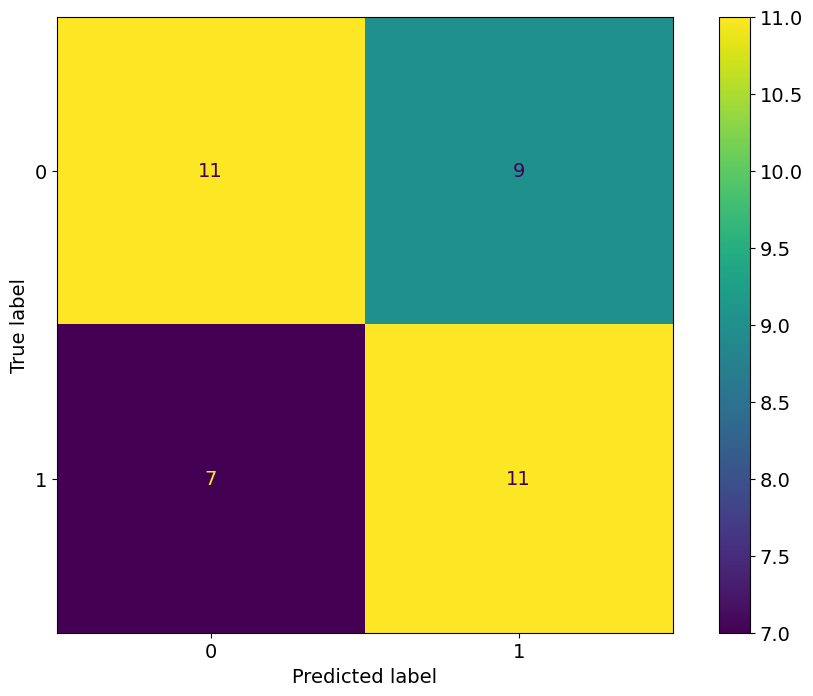

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


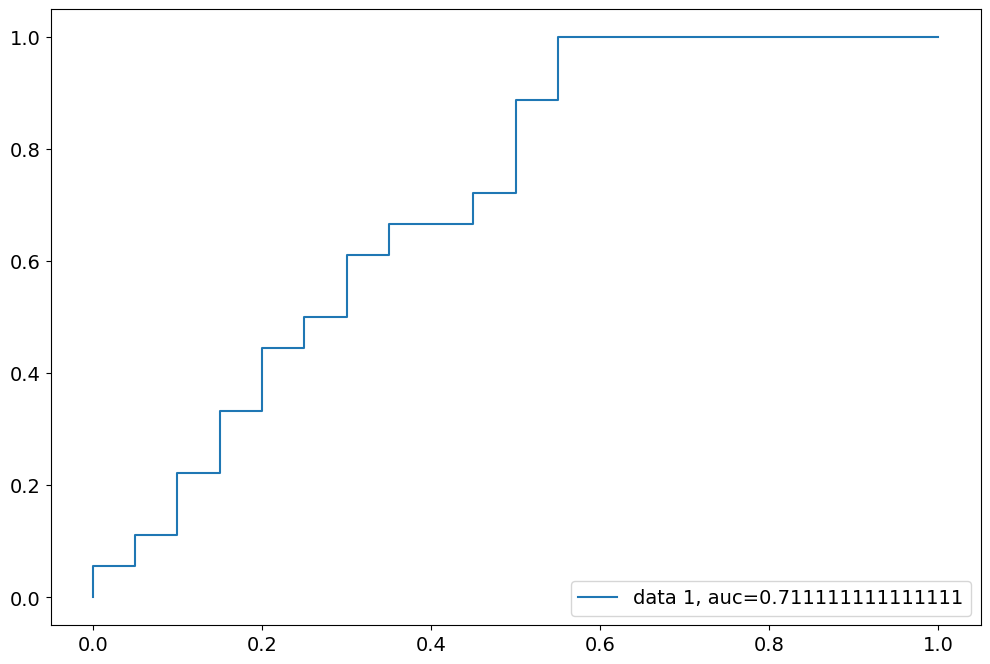

In [107]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



In [108]:
data

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,55.851042,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,13.843582,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,16.298826,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,13.790407,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,24.789548,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,17.204138,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,10.545153,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,13.252666,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,14.181352,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


## Random Forest Feature Selection for EEG w/ age and sex


**Note:**
The first column of data contains sex(1 - female ; 2 - male), the second column constains age, the third column contains speicfic_disorder(4 - Healthy control; 5 - Behavioral addiction disorder), and all the other columns are eeg channels

       0          1          2          3          4          5          6    \
0    34.16  72.431249  69.386059  62.775437  69.193931  69.447900  69.042085   
1    42.35  19.579138  19.703305  23.000027  31.034078  22.461115  23.616729   
2    35.16  17.916294  22.911557  19.951421  16.835759  16.792161  16.887329   
3    25.65  20.081892  17.928614  15.977752  18.119963  17.029861  13.545934   
4    18.89  18.429434  26.156602  15.751990  21.654509  26.128217  26.002065   
..     ...        ...        ...        ...        ...        ...        ...   
183  44.90  15.704347  16.697437  15.609133  16.450880  19.833692  25.798242   
184  29.59  22.942606  23.842689  25.716234  15.901378  15.949877  16.086458   
185  25.66  19.464531  33.772200   8.422497  14.893522  16.884854  17.626839   
186  26.14  25.079005  17.295701  18.689557  15.510216  14.614339  15.382783   
187  29.97  21.344131  16.080218  16.432277  15.770074  16.764789  16.712189   

           7          8          9    .

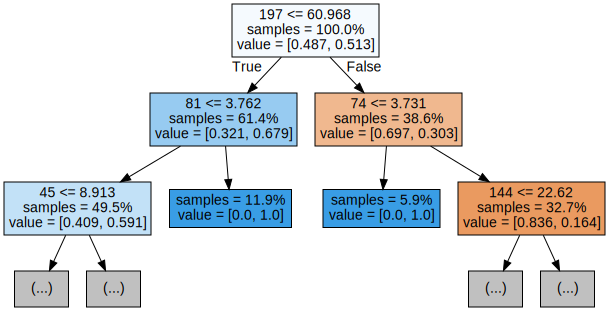

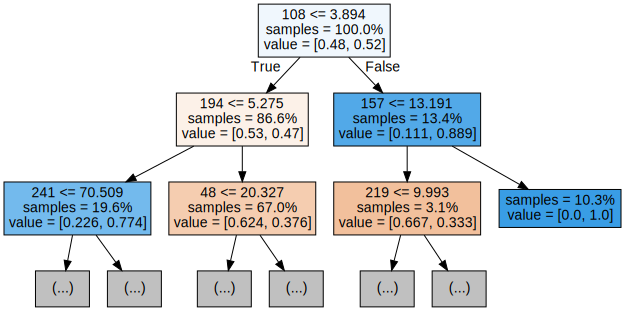

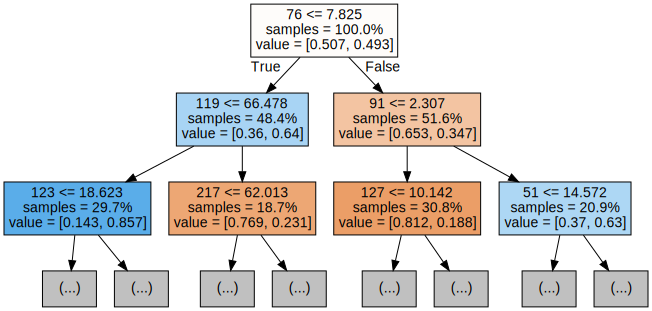

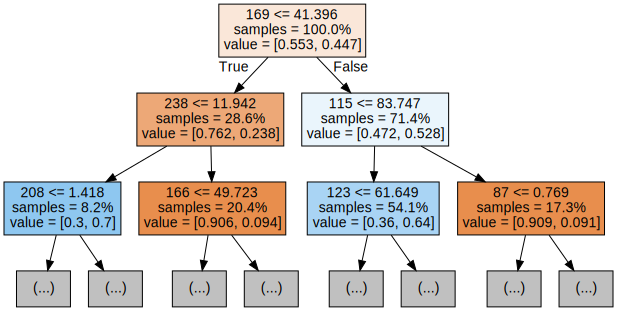

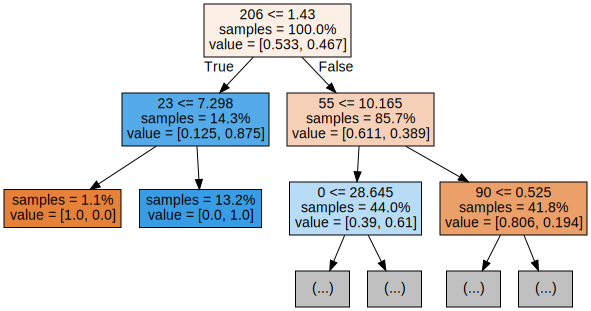

In [109]:
!pip install graphviz
# Install the necessary library
import graphviz
from sklearn.tree import export_graphviz
from io import StringIO  # Replacing six's StringIO
from IPython.display import Image
import pydotplus

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Drop rows with missing values
#X_train_clean = X_train.dropna()
#y_train_clean = y_train[X_train_clean.index]

# Train the random forest on the cleaned dataset
rf.fit(X_train, y_train)

print(data)
# Export and display the first three trees
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names = data.columns.tolist(),
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



## Feature Selection Visualization



https://mljar.com/blog/feature-importance-in-random-forest/

In [1]:
!pip install shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [2]:
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')

X = pd.DataFrame(data1.values, columns=data1.columns)
y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


       age  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0    34.16         72.431249         69.386059        62.775437   
1    42.35         19.579138         19.703305        23.000027   
2    35.16         17.916294         22.911557        19.951421   
3    25.65         20.081892         17.928614        15.977752   
4    18.89         18.429434         26.156602        15.751990   
..     ...               ...               ...              ...   
183  44.90         15.704347         16.697437        15.609133   
184  29.59         22.942606         23.842689        25.716234   
185  25.66         19.464531         33.772200         8.422497   
186  26.14         25.079005         17.295701        18.689557   
187  29.97         21.344131         16.080218        16.432277   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0          69.193931        69.447900        69.042085        57.324333   
1          31.034078        22.461115        

In [3]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [4]:
rf.feature_importances_

feature_index = X_train.columns.get_loc('COH.A.delta.f.F4.k.C4')

# Access the feature importance using the numerical index
feature_importance = rf.feature_importances_[feature_index]

# Print the feature importance
print(feature_importance)


0.08466137419603502


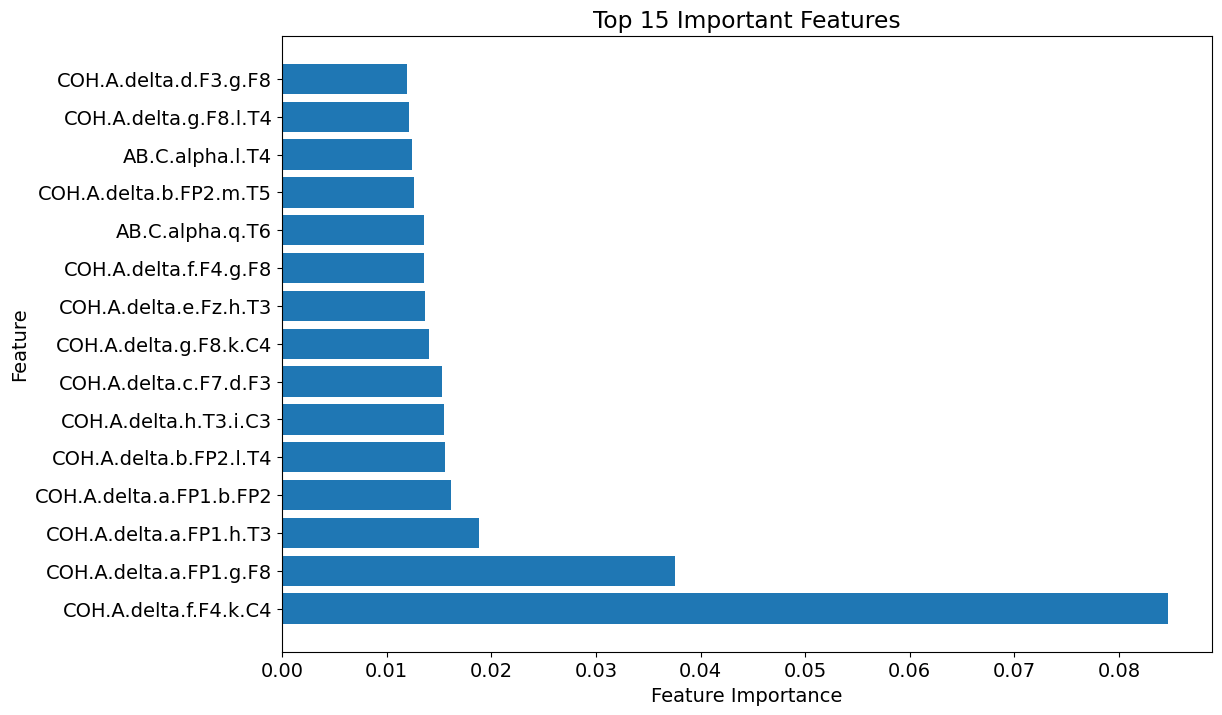

In [5]:
importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Select the top 15 features
top_15_features = feature_importance_df.head(15)

# Plot the top 15 features
plt.barh(top_15_features['feature'], top_15_features['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features")
plt.show()

In [6]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

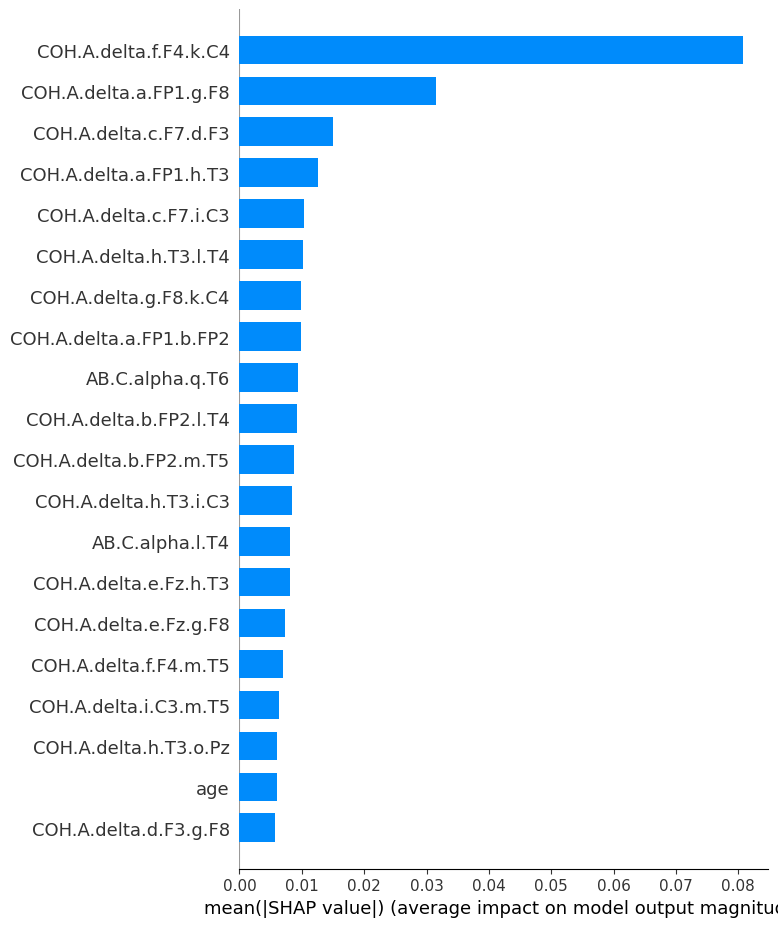

In [7]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

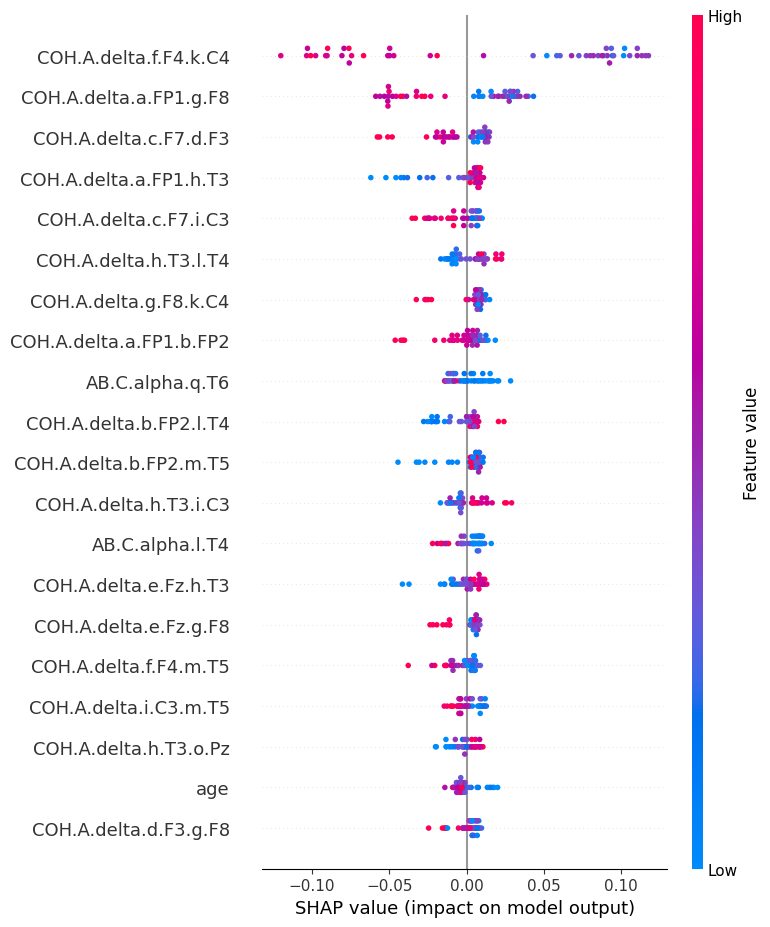

[[-1.38827715e-03 -2.90949705e-03  7.39788800e-04 ... -2.50775951e-04
  -3.10295773e-03 -2.40658571e-03]
 [-1.85825187e-03  3.64819454e-03  1.28875034e-04 ... -2.29168538e-04
   1.96535900e-04  2.12959533e-03]
 [-1.15896776e-03 -2.61109834e-03  1.28875034e-04 ... -2.29168538e-04
   1.91146059e-03  5.19594506e-03]
 ...
 [-3.57606325e-04  1.23049964e-04  1.63759825e-04 ... -3.63084544e-04
  -4.22335522e-05 -2.65391042e-03]
 [ 1.69145903e-02 -2.43836800e-03  1.00912395e-03 ... -5.79336010e-04
  -6.59146998e-03 -1.35112481e-04]
 [ 1.48146726e-02  1.82268777e-03  2.13869109e-04 ...  2.92613067e-03
   9.91292662e-05 -2.28079986e-04]]


In [8]:
shap.summary_plot(shap_values, X_test)
print(shap_values)


## Spectra Map


## Regression

COH.A.delta.f.F4.k.C4
Accuracy: 0.5789473684210527


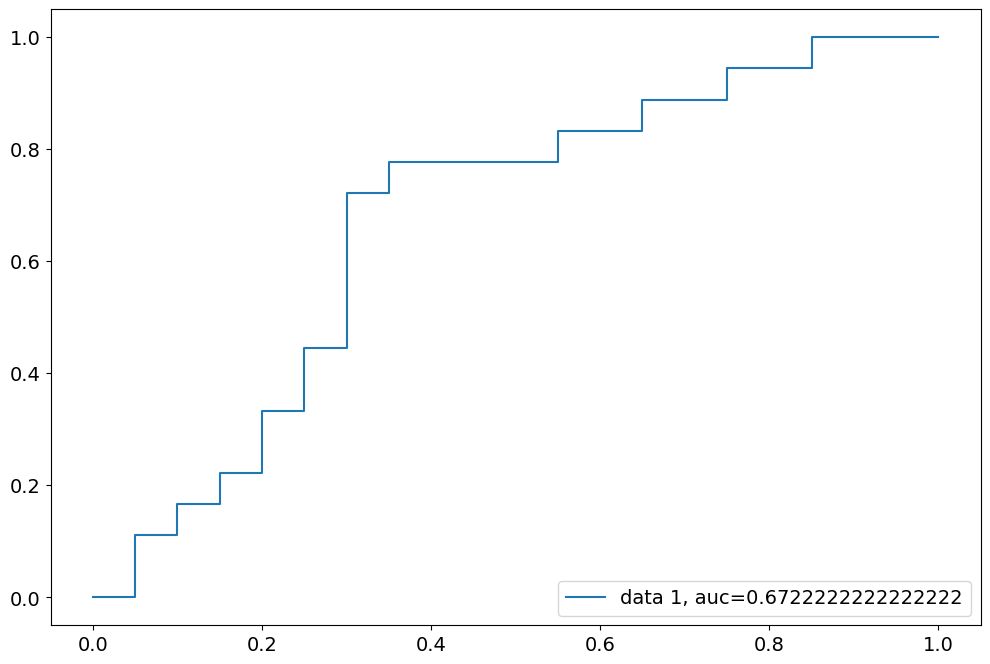

COH.A.delta.a.FP1.g.F8
Accuracy: 0.631578947368421


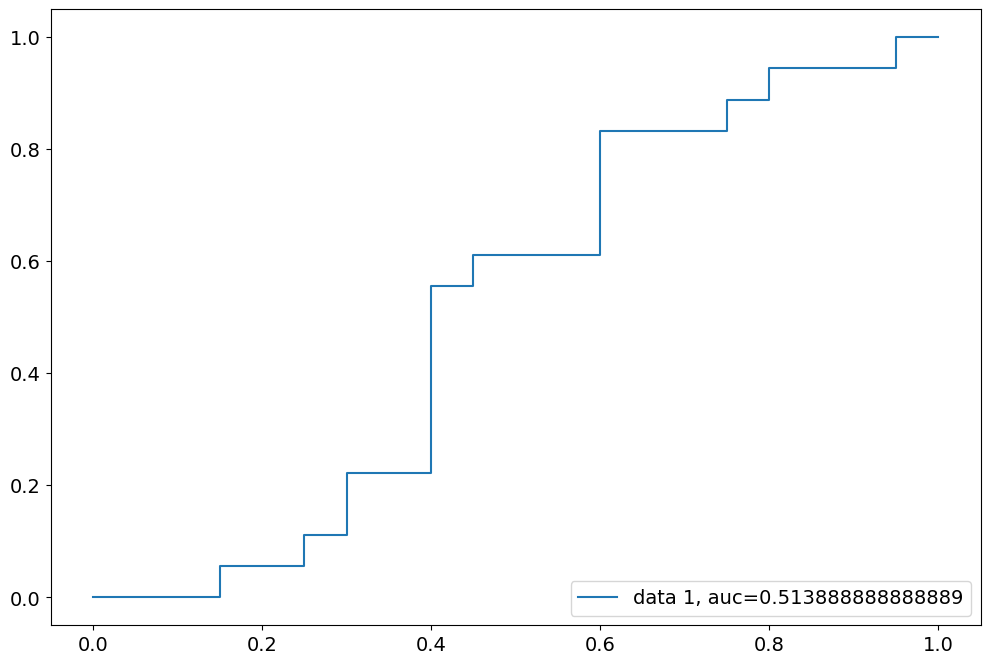

COH.A.delta.a.FP1.h.T3
Accuracy: 0.5263157894736842


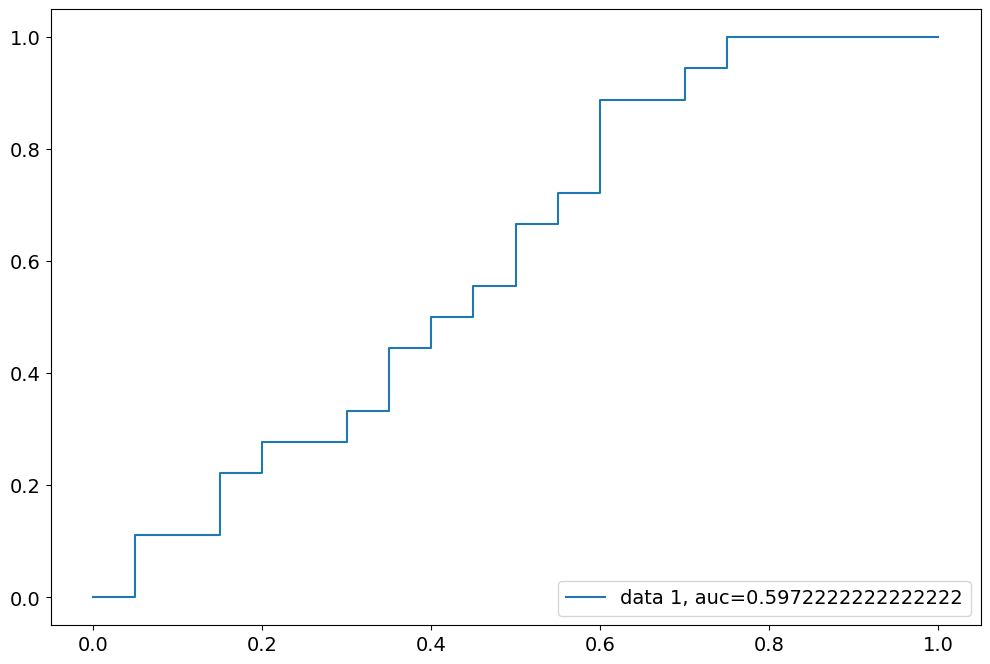

COH.A.delta.a.FP1.b.FP2
Accuracy: 0.5


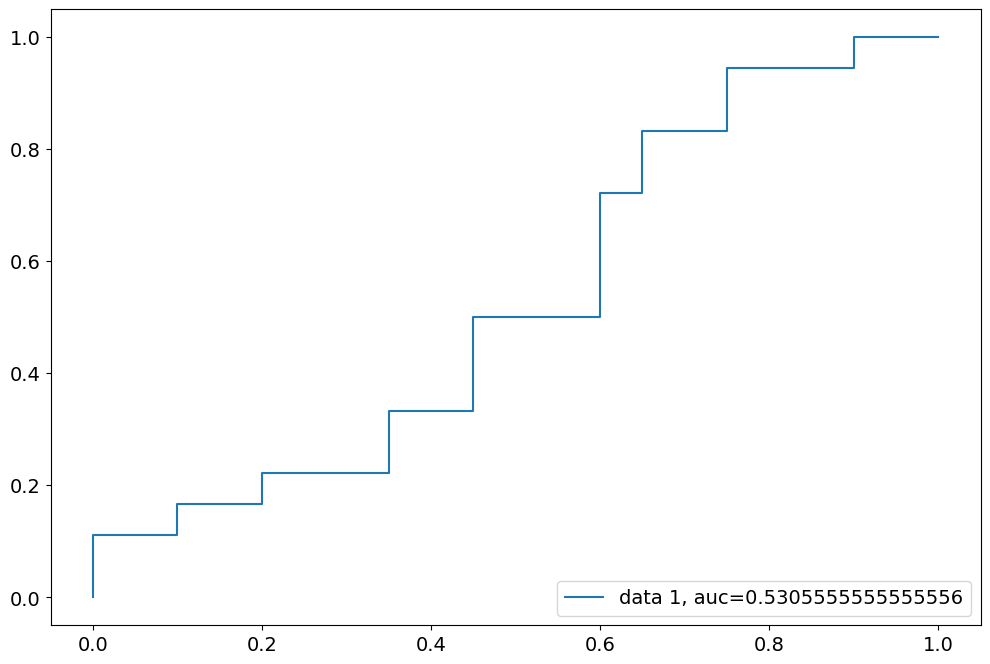

COH.A.delta.b.FP2.l.T4
Accuracy: 0.39473684210526316


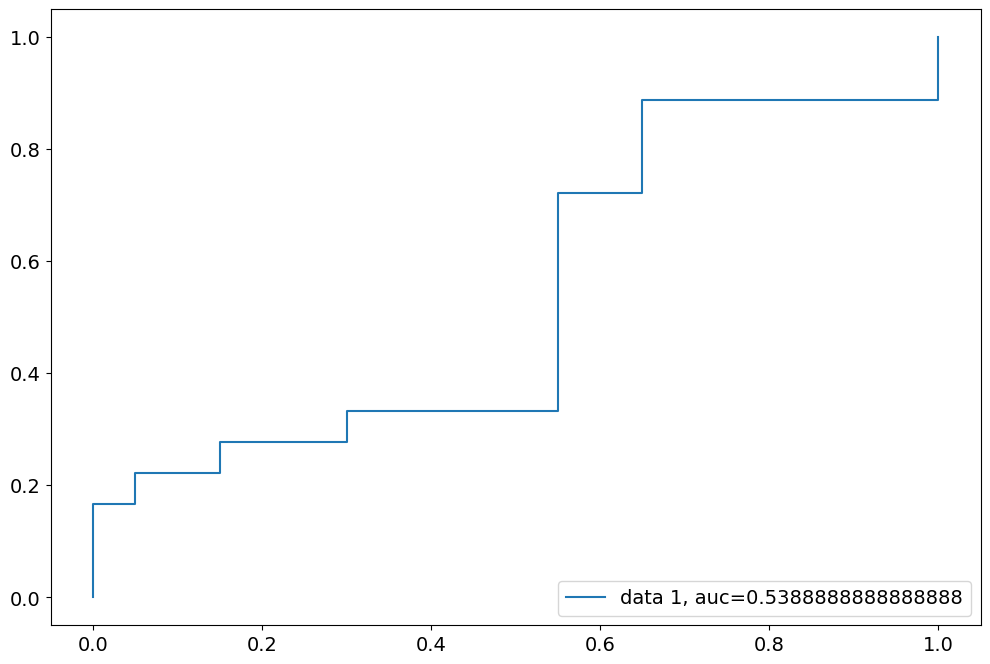

COH.A.delta.h.T3.i.C3
Accuracy: 0.3684210526315789


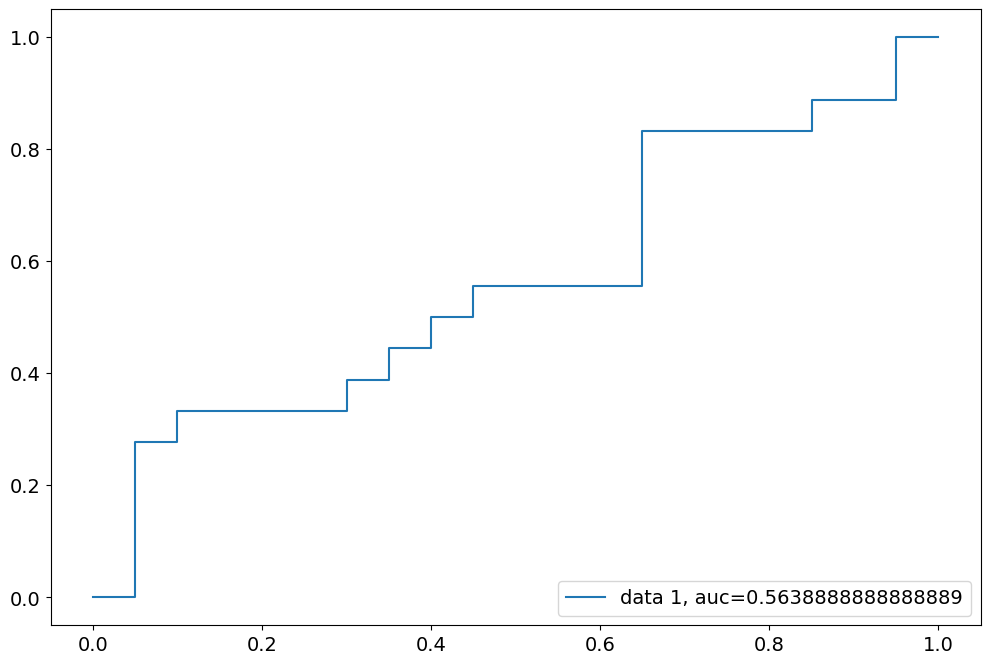

COH.A.delta.c.F7.d.F3
Accuracy: 0.5


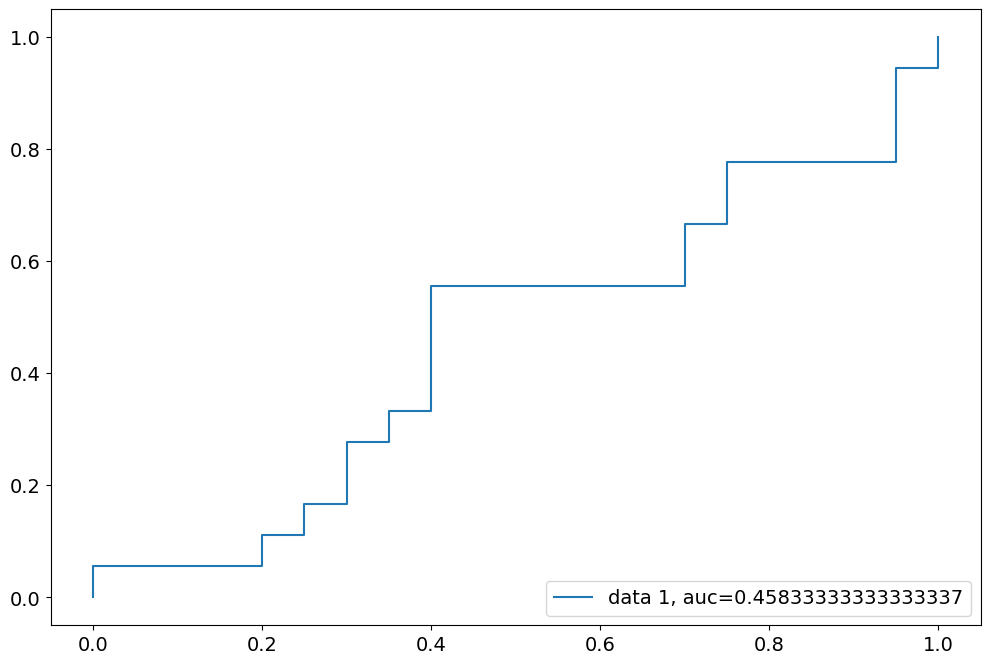

COH.A.delta.g.F8.k.C4
Accuracy: 0.631578947368421


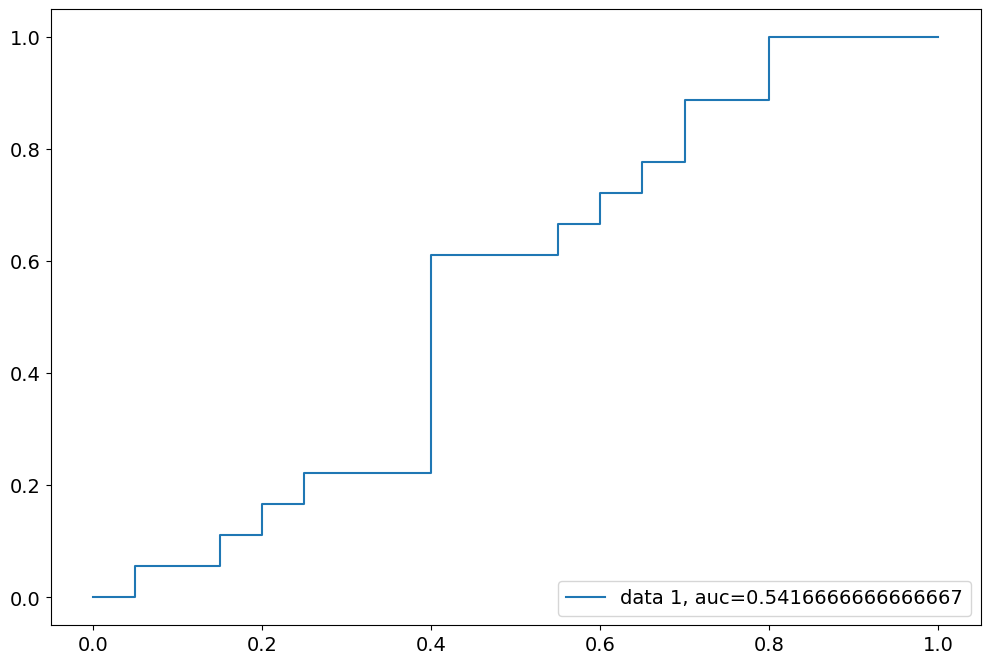

COH.A.delta.e.Fz.h.T3
Accuracy: 0.42105263157894735


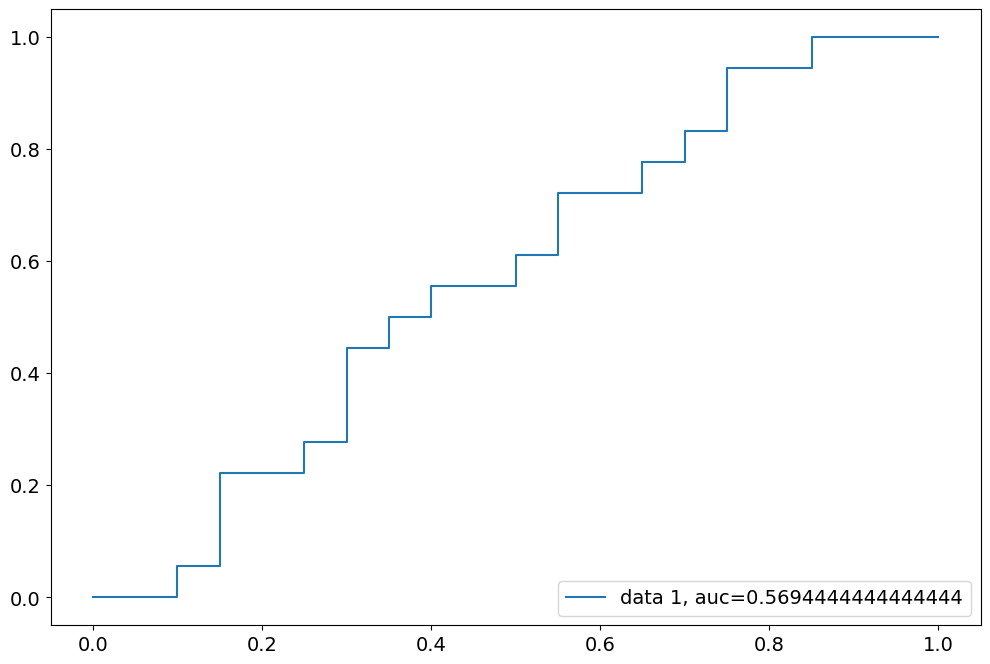

COH.A.delta.f.F4.g.F8
Accuracy: 0.5789473684210527


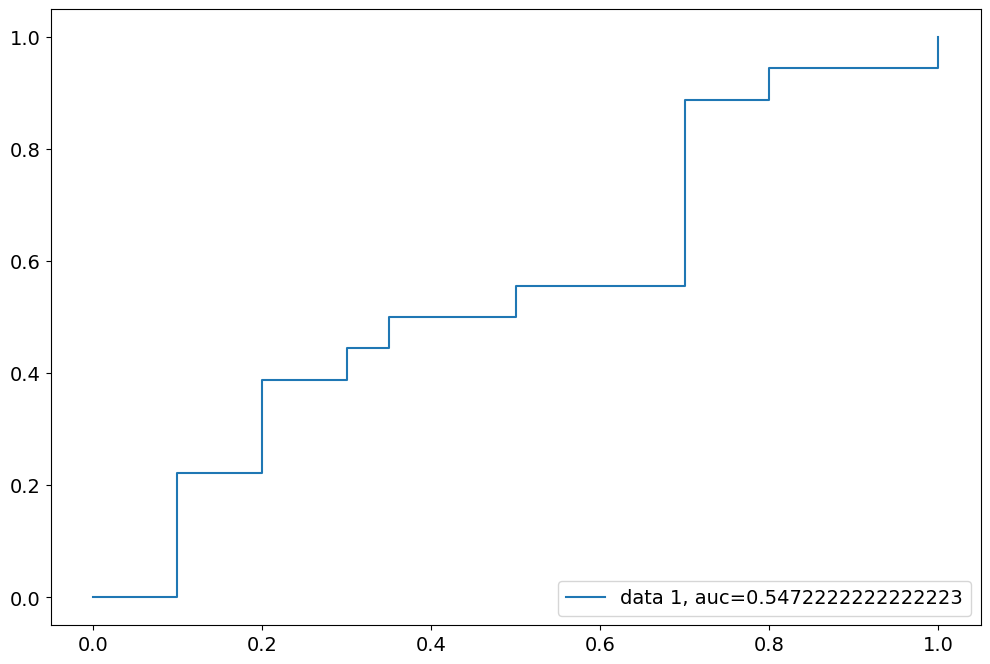

AB.C.alpha.q.T6
Accuracy: 0.47368421052631576


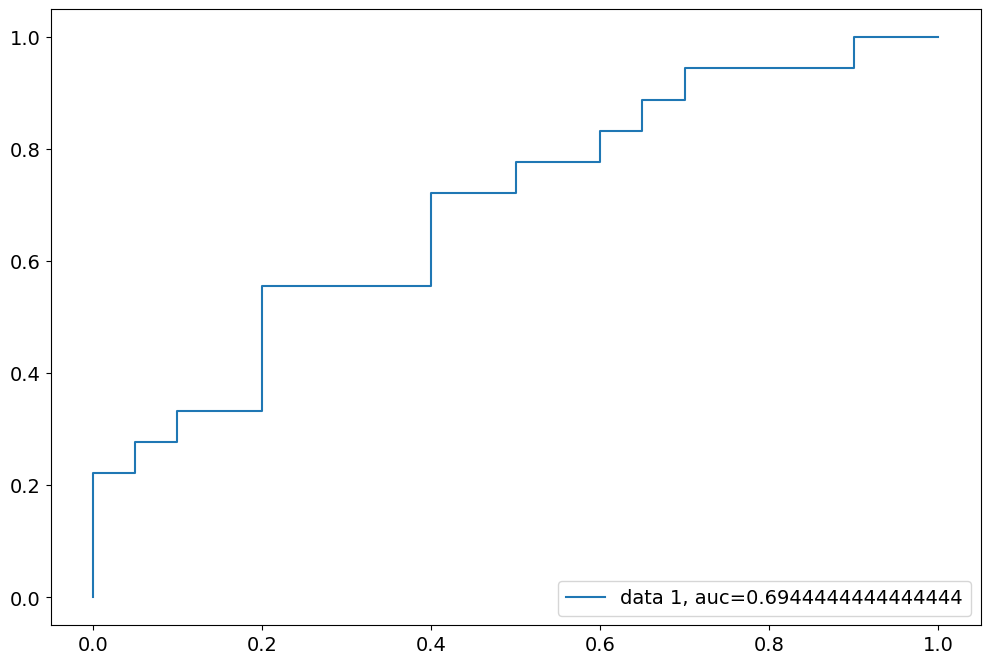

COH.A.delta.b.FP2.m.T5
Accuracy: 0.6578947368421053


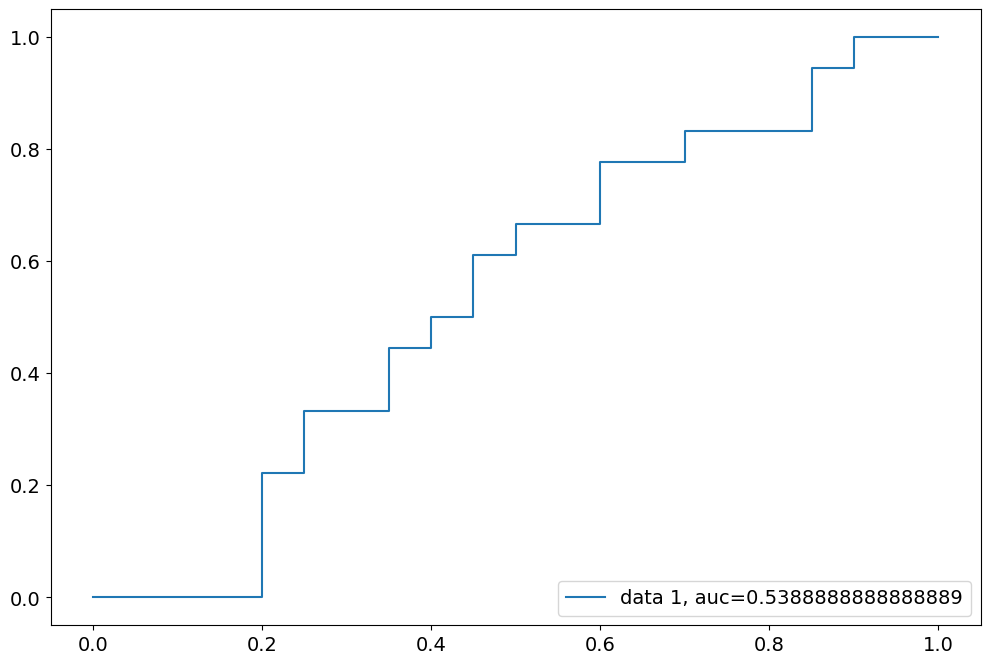

AB.C.alpha.l.T4
Accuracy: 0.5789473684210527


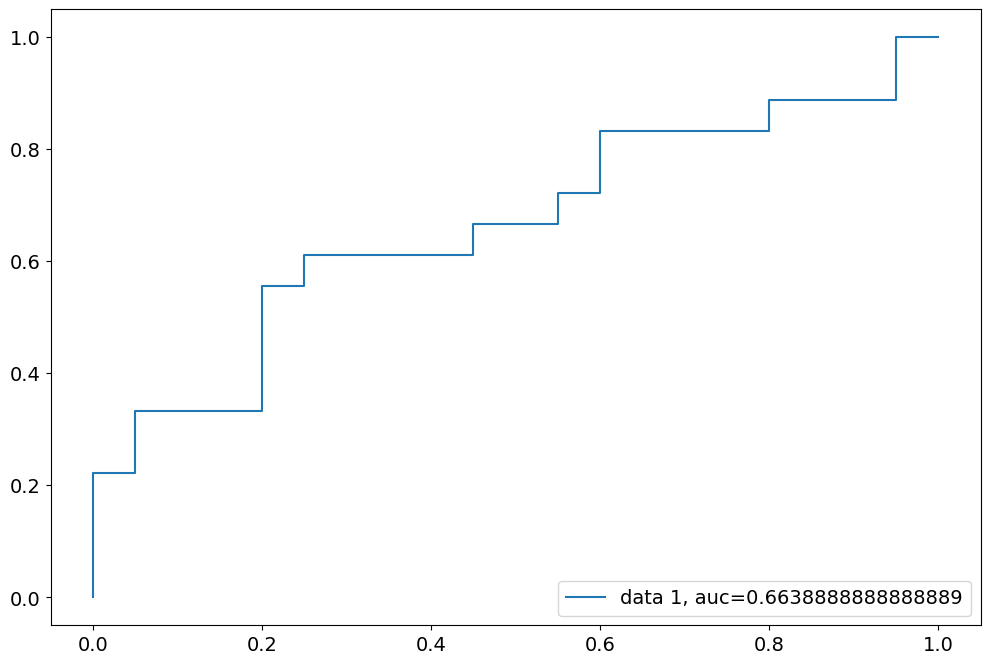

COH.A.delta.g.F8.l.T4
Accuracy: 0.5526315789473685


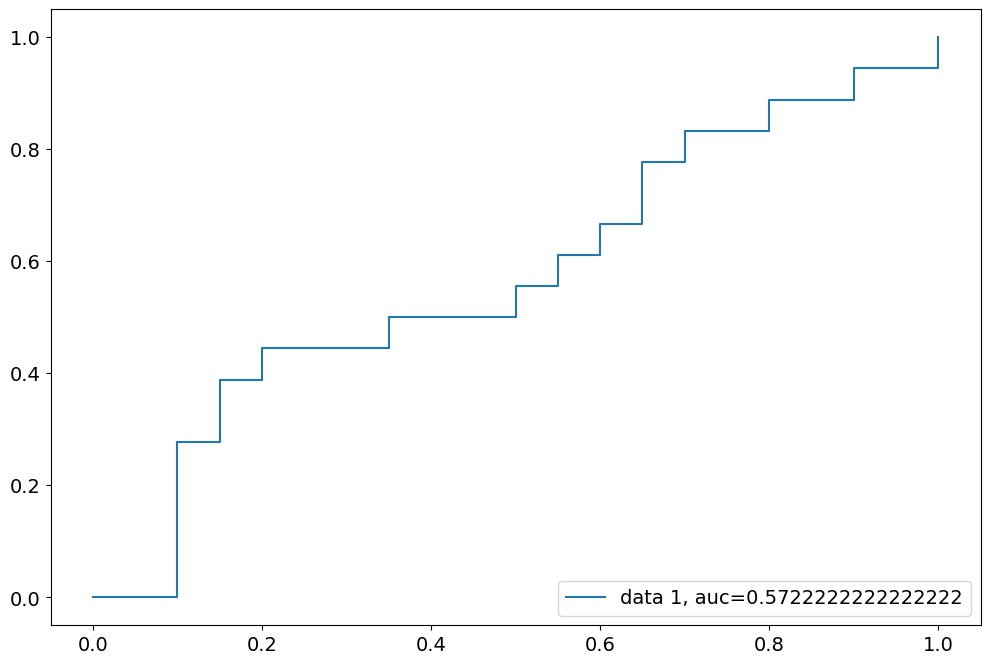

COH.A.delta.d.F3.g.F8
Accuracy: 0.47368421052631576


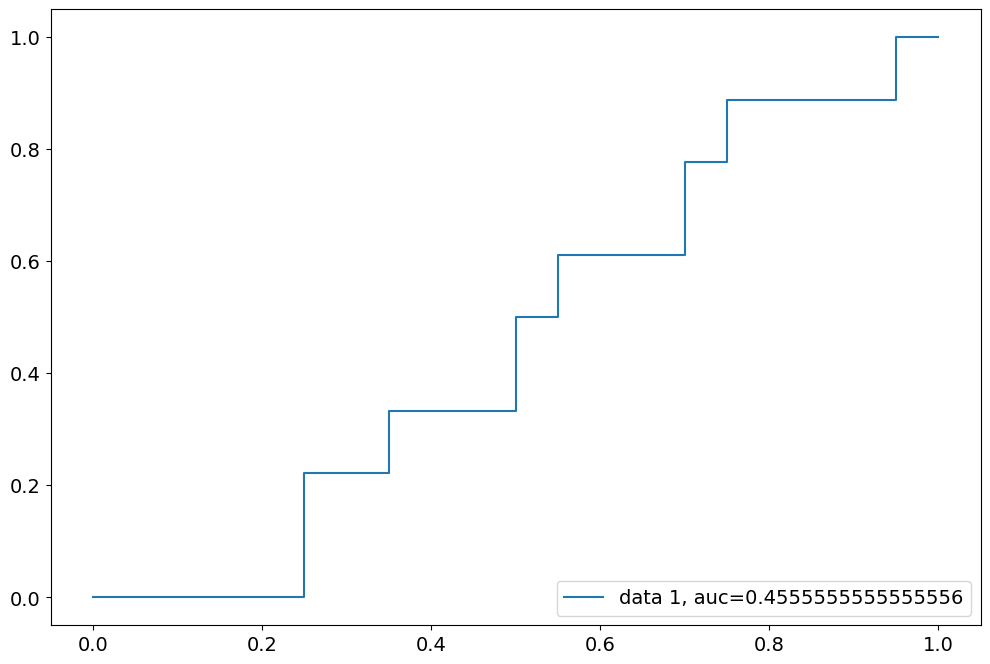

In [10]:
import random
random.seed(15)
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



# Assuming 'top_15_features' is a DataFrame with columns 'feature' and 'importance'
# Iterate over the values in the 'feature' column
for feature in top_15_features['feature']:  # Access the 'feature' column
  print(feature)
  data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')
  Y = data1['specific_disorder']
  # Use the current feature for X
  X = data1[[feature]]

  Y=Y.astype('str')
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier()

  # Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)


  # Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
  y_test_pred = clf.predict(X_test)

  print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

  logreg = LogisticRegression()
  #logreg.fit(X_train, y_train)
  logreg.fit(X, Y)

  y_pred_proba = logreg.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

In [186]:
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')
Y = data1['specific_disorder']
X = data1[['COH.A.delta.f.F4.k.C4']]
#'COH.A.delta.a.FP1.g.F8', 'COH.A.delta.c.F7.d.F3', 'sex', 'age', 'COH.A.delta.c.F7.i.C3'
print(X)


     COH.A.delta.f.F4.k.C4
0                76.639834
1                68.864418
2                79.477142
3                78.541404
4                37.628818
..                     ...
183              66.991806
184              72.191418
185              51.064942
186              65.202604
187              60.873129

[188 rows x 1 columns]


In [11]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(38, 1)
(150,)
(38,)


In [12]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.47368421052631576


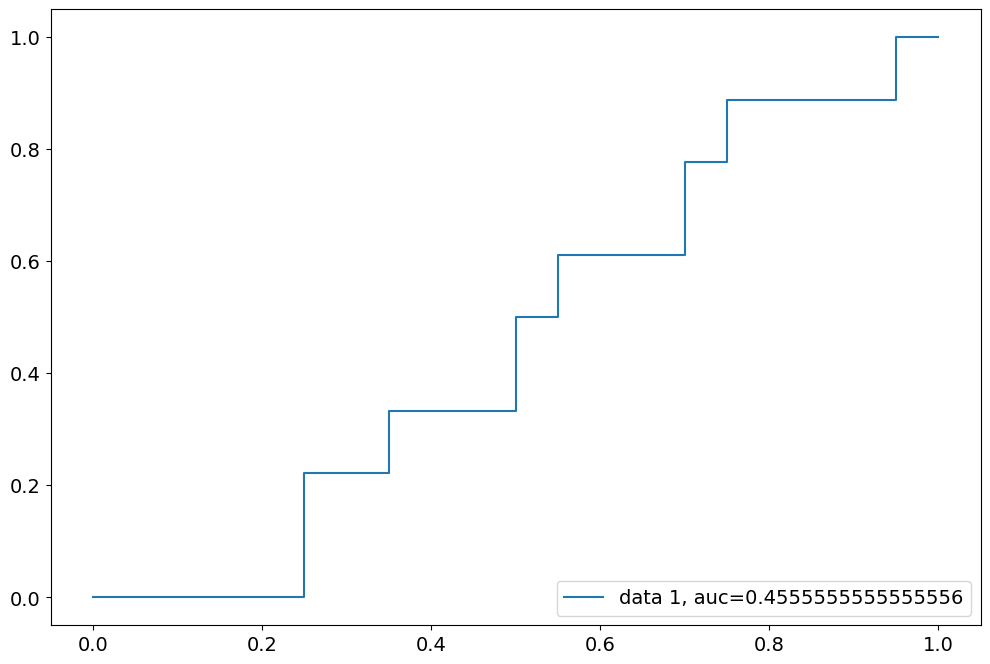

In [14]:

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [15]:
X = top_15_features['feature'].tolist()
X=data1[X]

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
print(X)
print(len(X))


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

     COH.A.delta.f.F4.k.C4  COH.A.delta.a.FP1.g.F8  COH.A.delta.a.FP1.h.T3  \
0                76.639834               51.937391               43.611160   
1                68.864418               31.445739               19.552409   
2                79.477142               52.457034               28.887044   
3                78.541404               69.483540               46.104637   
4                37.628818               61.467298               29.404801   
..                     ...                     ...                     ...   
183              66.991806               43.218549               34.752071   
184              72.191418               27.234749               17.694229   
185              51.064942               35.464644               44.471125   
186              65.202604               48.327899               38.699029   
187              60.873129               63.159951               12.283524   

     COH.A.delta.a.FP1.b.FP2  COH.A.delta.b.FP2.l.T4  COH.A.del

In [68]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

channel_num = 0
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')
Y = data1['specific_disorder']

# Convert 'specific_disorder' to binary (0 or 1)
# Assuming values other than 4 represent 0 and 4 represents 1
data1['specific_disorder'] = data1['specific_disorder'].apply(lambda x: 1 if x == 4 else 0)

for i in top_15_features['feature']:
    print("channel " + i)
    data1.rename(columns={i: f'channel_{channel_num}'}, inplace=True)
    print(data1[f'channel_{channel_num}'])

    X = data1[[f'channel_{channel_num}']]
    formula_str = f"specific_disorder ~ channel_{channel_num}"
    print(formula_str)

    log_reg = smf.logit(formula_str, data=data1).fit()
    print(log_reg.summary())

    odds_ratios = pd.DataFrame(
        {
            "OR": log_reg.params,
            "Lower CI": log_reg.conf_int()[0],
            "Upper CI": log_reg.conf_int()[1],
        }
    )
    odds_ratios = np.exp(odds_ratios)
    print(odds_ratios)
    print('''

    _______________________________________________________________________________________________________



    ''')

    channel_num += 1


channel COH.A.delta.f.F4.k.C4
0      76.639834
1      68.864418
2      79.477142
3      78.541404
4      37.628818
         ...    
183    66.991806
184    72.191418
185    51.064942
186    65.202604
187    60.873129
Name: channel_0, Length: 188, dtype: float64
specific_disorder ~ channel_0
Optimization terminated successfully.
         Current function value: 0.676365
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:      specific_disorder   No. Observations:                  188
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                 0.02413
Time:                        19:52:06   Log-Likelihood:                -127.16
converged:                       True   LL-Null:                       -130.30
Covariance Type:            nonrobust   LLR p-value: 

<ipython-input-73-398f1c590a38>:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False, ax=ax, color='blue', marker='o')


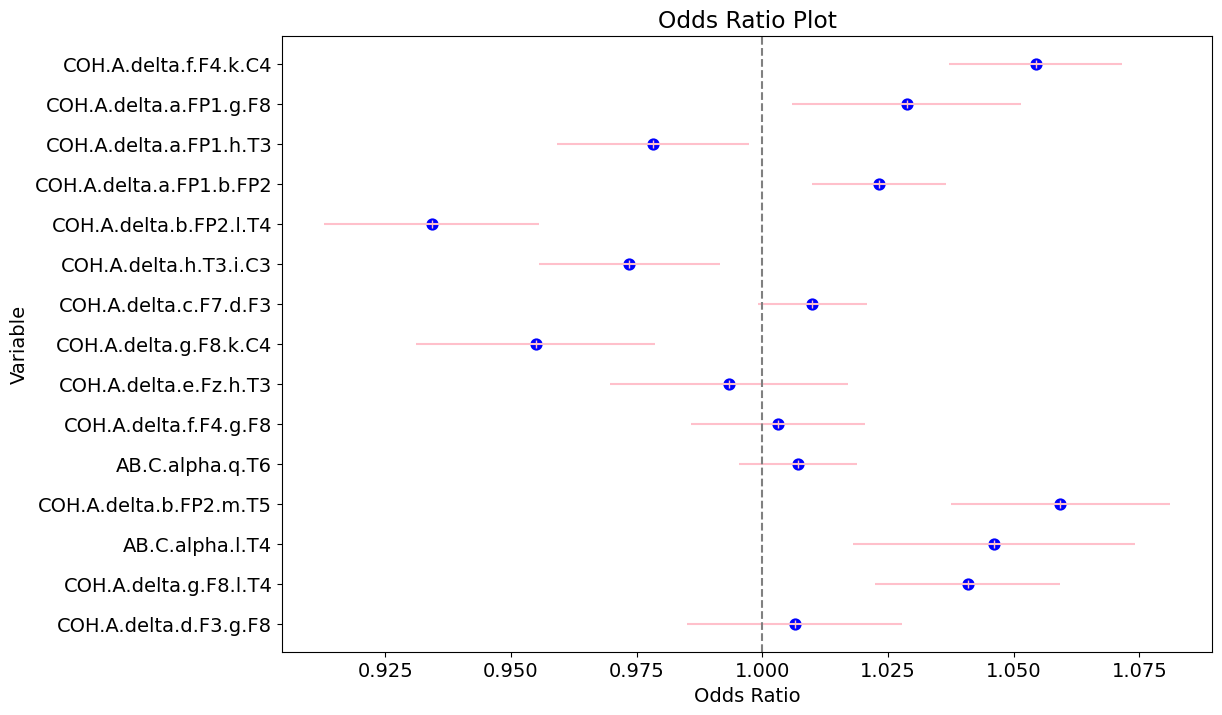

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
df = pd.DataFrame({'Odds Ratio': odds_ratios, 'Variable': feature_names})
lower_bound = odds_ratios - std_err  # Lower bound of confidence interval
upper_bound = odds_ratios + std_err  # Upper bound of confidence interval

# Add confidence intervals to the DataFrame
df['Lower Bound'] = lower_bound
df['Upper Bound'] = upper_bound

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the point estimates (odds ratios)
sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False, ax=ax, color='blue', marker='o')

# Add error bars using ax.errorbar
ax.errorbar(
    x=df['Odds Ratio'],
    y=df['Variable'],
    xerr=[df['Odds Ratio'] - df['Lower Bound'], df['Upper Bound'] - df['Odds Ratio']],
    fmt='|',
    color='pink'
)

plt.axvline(1, linestyle='--', color='gray')  # Add a line at odds ratio = 1
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Odds Ratio Plot')
plt.show()


## `Age and Sex without EEG - Specific Disorder Prediction`

The higher prediction value when only using age and sex proves that the first model is taking eeg channels into account

In [ ]:
data1 = pd.read_csv('/content/NoEEG - only extras.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/NoEEG - only extras.csv'

In [ ]:
Y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(X)

In [ ]:
data = pd.DataFrame(data2)
X=data

Y
data

In [ ]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 2)
(38, 2)
(150,)
(38,)


In [ ]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.7631578947368421


In [ ]:
#prediction after fixing class imbalance

from imblearn.over_sampling import RandomOverSampler
Y=Y.astype('str')
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X, Y = oversampler.fit_resample(data2, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

(152, 2)
(38, 2)
(152,)
(38,)
Accuracy: 0.7894736842105263


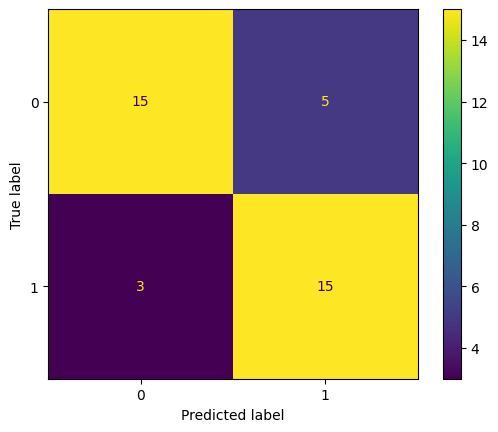

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

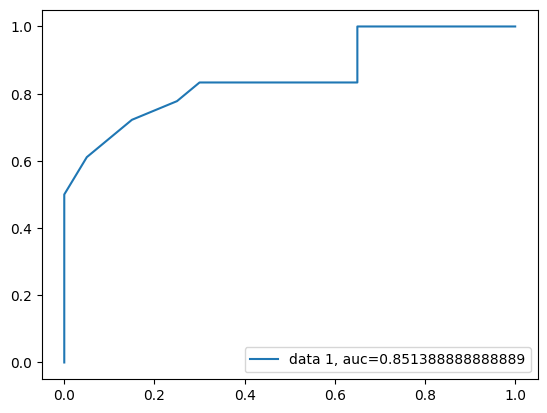

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [38]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

     COH.A.delta.f.F4.k.C4
0                76.639834
1                68.864418
2                79.477142
3                78.541404
4                37.628818
..                     ...
183              66.991806
184              72.191418
185              51.064942
186              65.202604
187              60.873129

[188 rows x 1 columns]
                            OLS Regression Results                            
Dep. Variable:      specific_disorder   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.289
Date:                Sat, 19 Oct 2024   Prob (F-statistic):             0.0130
Time:                        00:25:55   Log-Likelihood:                -133.31
No. Observations:                 188   AIC:                             270.6
Df Residuals:                     186   BIC:                             277.1
Df Model:           